In [87]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

ROOT_DIR = Path.cwd().resolve().parent
DATA_DIR = ROOT_DIR / 'data' / 'raw'

#plt.style.use('fivethirtyeight')
sns.set(style='darkgrid',palette='husl')

In [77]:
df = pd.read_csv(DATA_DIR / 'airline_delay.csv')

In [99]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3351.000000,3351.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.459266,12.0,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498412,0.0,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


### Distribution of Flight Counts by Airline Carrier

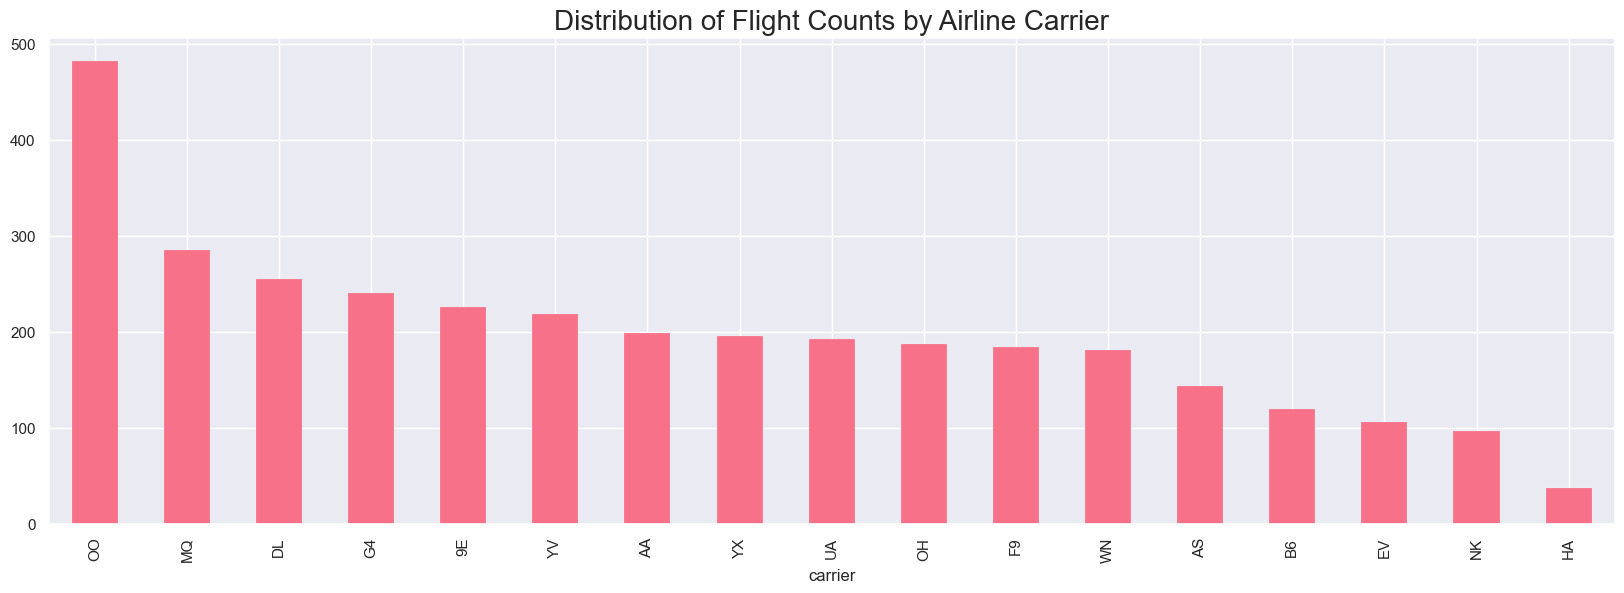

In [88]:
plt.figure(figsize=(18,6))
df['carrier'].value_counts().plot(kind='bar', linewidth=0.1)
plt.title('Distribution of Flight Counts by Airline Carrier', fontsize=20)
plt.show()

### Top 15 Flight Counts by Airport

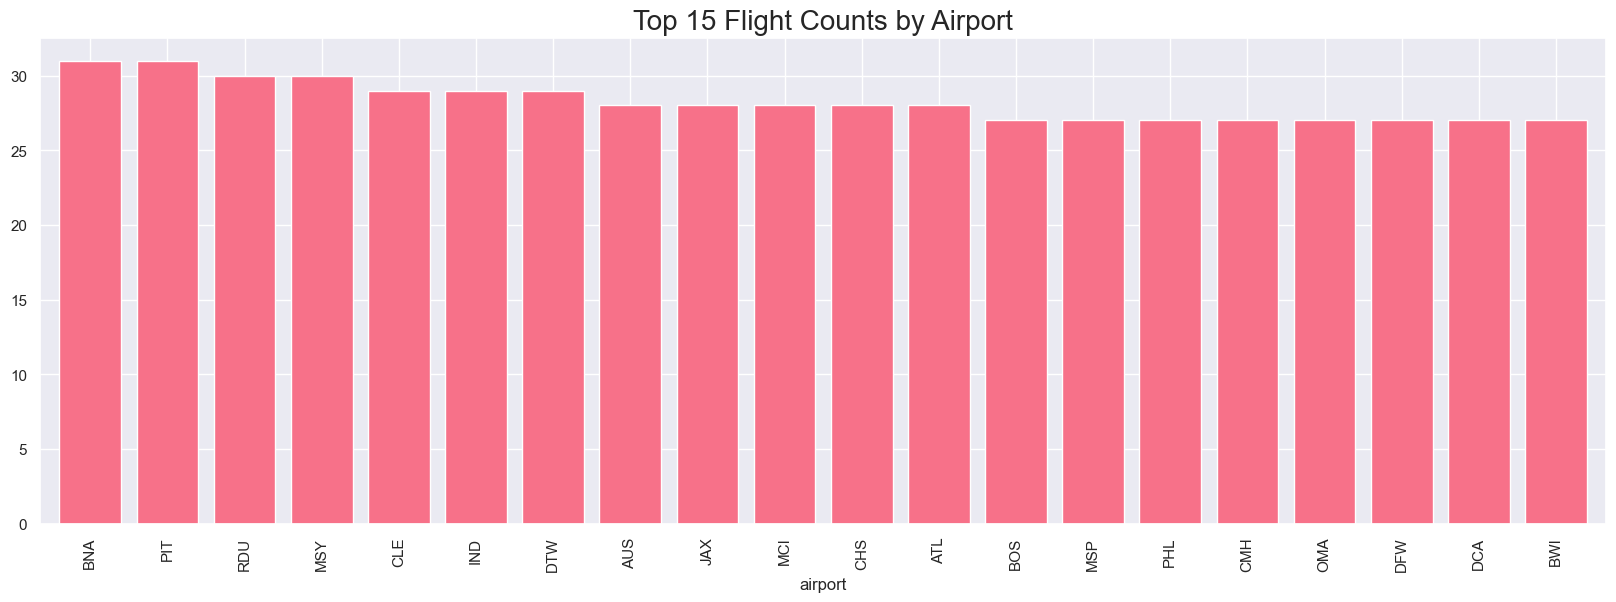

In [89]:
plt.figure(figsize=(18,6))
df['airport'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', width=0.8)
plt.title('Top 15 Flight Counts by Airport', fontsize=20)
plt.show()

### Top 25 Flight delay due to security concerns

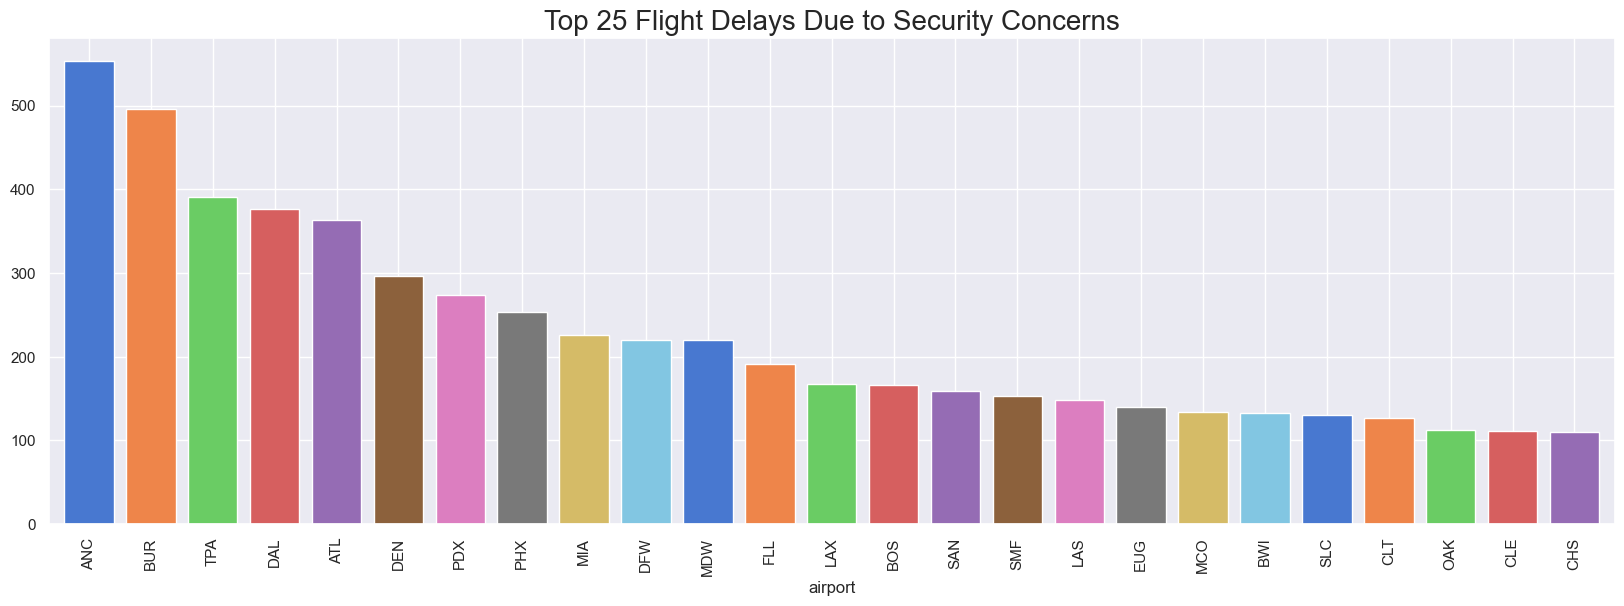

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
colors = sns.color_palette('muted', 25)  # 25 different colors

# Create the plot
plt.figure(figsize=(18, 6))
df.groupby('airport')['security_delay'].max().sort_values(ascending=False).head(25).plot(kind='bar', width=0.8, color=colors)
plt.title('Top 25 Flight Delays Due to Security Concerns', fontsize=20)
plt.show()


In [102]:
x = df[['carrier','airport','arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather'late_aircraft_delay'_delay', 'nas_delay',
       'security_delay', ]]

In [106]:
x['late_aircraft_delay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3351 entries, 0 to 3350
Series name: late_aircraft_delay
Non-Null Count  Dtype  
--------------  -----  
3343 non-null   float64
dtypes: float64(1)
memory usage: 26.3 KB


In [104]:
x.drop('late_aircraft_delay', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carrier           3351 non-null   object 
 1   airport           3351 non-null   object 
 2   arr_flights       3343 non-null   float64
 3   arr_del15         3343 non-null   float64
 4   carrier_ct        3343 non-null   float64
 5   weather_ct        3343 non-null   float64
 6   nas_ct            3343 non-null   float64
 7   security_ct       3343 non-null   float64
 8   late_aircraft_ct  3343 non-null   float64
 9   arr_cancelled     3343 non-null   float64
 10  arr_diverted      3343 non-null   float64
 11  arr_delay         3343 non-null   float64
 12  carrier_delay     3343 non-null   float64
 13  weather_delay     3343 non-null   float64
 14  nas_delay         3343 non-null   float64
 15  security_delay    3343 non-null   float64
dtypes: float64(14), object(2)
memory usage: 41

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f